In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
columns_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATION', 'B', 'LSTAT', 'MEDV']

In [3]:
df = pd.read_csv("housing.csv", names = columns_names, na_values = "?", sep = " ", skipinitialspace = True)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# We are going to split our data in 80% training and 20% test
training_data = df.sample(frac = 0.8, random_state = 0)
test_data = df.drop(training_data.index)

In [6]:
#Our input variable will be RM and our target MEDV

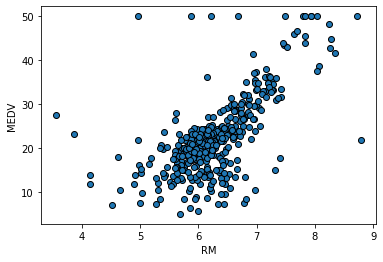

In [7]:
# ploting the training data
fig, ax = plt.subplots()
x = training_data['RM']
y = training_data['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [8]:
x_training = training_data['RM']
y_training = training_data['MEDV']
x_test = test_data['RM']
y_test = test_data['MEDV']

In [9]:
def linear_model():
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01,
                                         beta_1 = 0.9,
                                         beta_2 = 0.99,
                                         epsilon = 1e-05,
                                         amsgrad = False,
                                         name = 'Adam')
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])

    return model

In [10]:
model = linear_model()

In [12]:
# Training the model
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_training.shape[0]


In [14]:
# Callback - we can use earlystopping to avoid overfitting 
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = n_idle_epochs, min_delta = 0.0001)

In [16]:
prediction_list = []
checkpoint_path = "dados/"

In [33]:
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", verbose = 0, save_weights_only = True, save_freq = n_samples_save)

In [34]:
#saving the first version
model.save_weights(checkpoint_path.format(epoch = 0))

In [36]:
history = model.fit(x_training, y_training, batch_size = batch_size, epochs = n_epochs,
                   validation_split = 0.1, verbose = 0, callbacks = [earlyStopping, checkpointCallback])

In [23]:
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [24]:
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [27]:
steps = pd.RangeIndex(start = 0, stop = num_values)
df2 = pd.DataFrame(values, steps, columns = ["Training MSE", "Validation MSE"])
df2.head()

,Training MSE,Validation MSE
0,452.092133,534.011902
1,446.374237,527.867737
2,440.641144,521.777649
3,434.985413,515.743713
4,429.295380,509.764526


<AxesSubplot:>

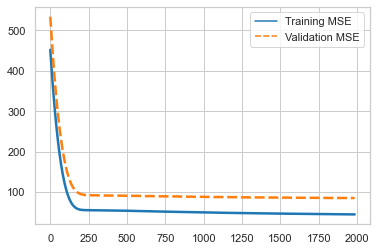

In [28]:
# Ploting
sns.set(style = "whitegrid")
sns.lineplot(data = df2, palette = "tab10", linewidth = 2.5)


In [31]:
prediction = model.predict(x_test).flatten()

In [32]:
prediction

array([20.976885, 18.598063, 23.860834, 21.376291, 20.659704, 20.753687,
       24.448195, 21.946032, 21.129599, 20.94164 , 25.746267, 23.402689,
       21.335173, 22.727224, 23.23823 , 21.664095, 26.868132, 23.332209,
       29.270445, 20.078218, 20.530485, 21.076735, 19.37338 , 20.976885,
       19.150183, 23.484922, 22.868193, 14.645113, 17.452705, 34.90325 ,
       21.546625, 18.439474, 20.125208, 22.803583, 31.320341, 24.26024 ,
       21.852053, 27.872522, 25.652292, 31.96644 , 27.455492, 30.40993 ,
       31.837221, 17.452705, 23.056147, 23.261724, 18.562822, 23.526037,
       36.83568 , 35.038345, 18.36899 , 34.445114, 30.88569 , 25.805006,
       23.614141, 22.803583, 26.010584, 27.69631 , 24.653776, 24.283735,
       23.161871, 19.23829 , 23.390944, 22.809454, 21.170713, 20.336657,
       21.299932, 22.198595, 21.699339, 21.611235, 26.920992, 24.765375,
       11.367628, 14.374926, 17.370474, 23.332209, 17.740515, 18.198656,
       23.367449, 21.558374, 20.342531, 25.84612 , 